In [ ]:
pip install pyspark

In [18]:

# Print Spark version
print(f"Spark version: {spark.version}")

# Create some sample data
data = [
    ("Alice", 25),
    ("Bob", 30),
    ("Charlie", 28),
]

# Create a DataFrame from the data
df = spark.createDataFrame(data, ["name", "age"])

# Print the DataFrame schema
print(df.schema)

# Show the first few rows of the DataFrame
df.show(2)



Spark version: 3.5.1
StructType([StructField('name', StringType(), True), StructField('age', LongType(), True)])
+-----+---+
| name|age|
+-----+---+
|Alice| 25|
|  Bob| 30|
+-----+---+
only showing top 2 rows



In [ ]:
df = spark.read.csv("../input/cruise-used-for-pyspark/cruise_dataset.csv", inferSchema=True, header=True)

In [ ]:
df.printSchema()

In [22]:
import pandas as pd

url_github = 'https://raw.githubusercontent.com/AISCIENCES/course-master-big-data-with-pyspark-and-aws/main/Code/03-Spark%20DFs/StudentData.csv'


pd_df = pd.read_csv(url_github)
spark_df = spark.createDataFrame(pd_df)

display(spark_df.limit(5))

DataFrame[age: bigint, gender: string, name: string, course: string, roll: bigint, marks: bigint, email: string]

In [19]:
display(spark_df)

DataFrame[age: bigint, gender: string, name: string, course: string, roll: bigint, marks: bigint, email: string]

In [ ]:
display(spark_df.head(5))

In [23]:
spark_df.limit(5).toPandas().head(5)

,age,gender,name,course,roll,marks,email
0,28,Female,Hubert Oliveras,DB,2984,59,Annika Hoffman_Naoma Fritts@OOP.com
1,29,Female,Toshiko Hillyard,Cloud,12899,62,Margene Moores_Marylee Capasso@DB.com
2,28,Male,Celeste Lollis,PF,21267,45,Jeannetta Golden_Jenna Montague@DSA.com
3,29,Female,Elenore Choy,DB,32877,29,Billi Clore_Mitzi Seldon@DB.com
4,28,Male,Sheryll Towler,DSA,41487,41,Claude Panos_Judie Chipps@OOP.com


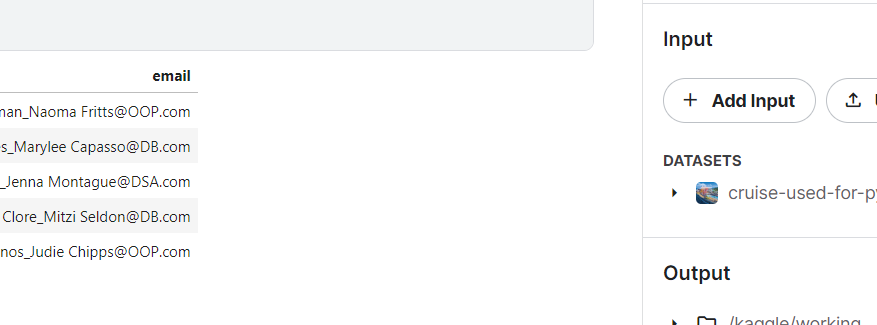